# Algorithm Performance Analysis
This program will be used to plot the average results of the inexact and naive algorithms for jobs of various sizes. Specifically, it will visualize the average job demand peak above the resource curve for job batches ranging in size from x - y
\
\
In this way, we can visualize trends for how the main relaxed LP algorithm (inexact) performs on different job batch sizes. 

In [19]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [20]:
start_size = 25
end_size = 125
step_size = 25

final_inexact_averages = []
final_naive_averages = []
# final_exact_averages = []
final_greedy_averages = []

trial_nums = 4


path = "../../Output_Data/AAC_Results/greedy_vs_inexact.csv"
with open(path, "r") as file:
    data = list(csv.DictReader(file))

    print(data)

    for i in range((end_size - start_size) // step_size):
        total_sum_inexact = 0
        total_sum_naive = 0
        # total_sum_exact = 0
        total_sum_greedy = 0

        num_entries = 0

        for line in data[i * trial_nums: (i * trial_nums) + trial_nums]:
            total_sum_inexact += float(line['inexact objective val'])
            total_sum_naive += float(line['naive objective val'])
            # total_sum_exact += float(line['exact objective val'])
            total_sum_greedy += float(line['greedy objective val'])
            num_entries += 1
        
        inexact_avg = total_sum_inexact / num_entries
        naive_avg = total_sum_naive / num_entries
        # exact_avg = total_sum_exact / num_entries
        greedy_avg = total_sum_greedy / num_entries
    
        final_inexact_averages.append(inexact_avg)
        final_naive_averages.append(naive_avg)
        # final_exact_averages.append(exact_avg)
        final_greedy_averages.append(greedy_avg)

[{'batch_size': '600', 'trial #': '0', 'naive objective val': '31463.324000000008', 'inexact objective val': '13151.074', 'greedy objective val': '13302.80399999999'}, {'batch_size': '600', 'trial #': '1', 'naive objective val': '22667.697000000026', 'inexact objective val': '7582.216000000008', 'greedy objective val': '5633.687000000002'}, {'batch_size': '600', 'trial #': '2', 'naive objective val': '21545.836999999996', 'inexact objective val': '5250.682000000004', 'greedy objective val': '5037.8920000000035'}, {'batch_size': '600', 'trial #': '3', 'naive objective val': '25726.30699999999', 'inexact objective val': '10092.335999999988', 'greedy objective val': '9158.007000000001'}, {'batch_size': '600', 'trial #': '4', 'naive objective val': '34682.687000000005', 'inexact objective val': '14496.962000000003', 'greedy objective val': '10716.385999999995'}, {'batch_size': '700', 'trial #': '0', 'naive objective val': '23204.111999999997', 'inexact objective val': '6268.332000000013', 

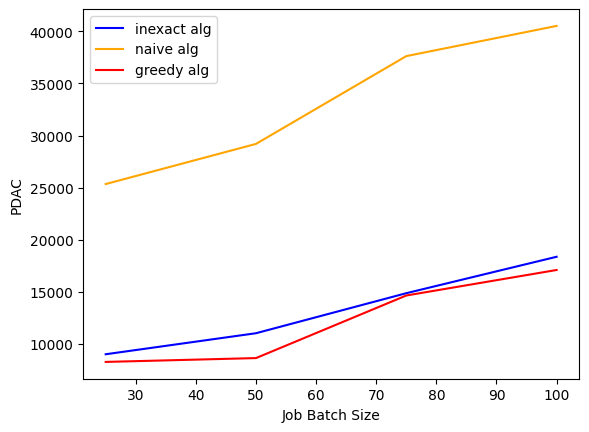

In [21]:
x_values = np.array([i for i in range(start_size, end_size, step_size)])

inexact_values = np.array(final_inexact_averages)
naive_values = np.array(final_naive_averages)
# exact_values = np.array(final_exact_averages)
greedy_values = np.array(final_greedy_averages)

# print(len(x_values), len(inexact_values))

plt.plot(x_values, inexact_values, label='inexact alg', color='blue')
plt.plot(x_values, naive_values, label='naive alg', color='orange')
# plt.plot(x_values, exact_values, label='exact alg', color='green')
plt.plot(x_values, greedy_values, label='greedy alg', color='red')

plt.xlabel("Job Batch Size")
plt.ylabel("PDAC")
plt.legend()

plt.show()